In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rcParams, rc
from matplotlib import ticker, cm

plt.style.use('../../Paul_style.txt')
plt.rcParams["font.family"] = "Serif"
plt.rcParams['text.usetex'] = True

from distinctipy import distinctipy

colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#42d4f4', '#f032e6', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#000075', '#a9a9a9', '#ffffff', '#000000']

In [5]:
planet_names = [#'HD189-DOGRAY',
                #'HD189-DOGRAY-ALL-CLOUDS',
                #'HD189-DOGRAY-ALL-CLOUDS-COMPACT',
                #'HD189-DOGRAY-NUC-CLOUDS',
                #'HD189-DOGRAY-NUC-CLOUDS-COMPACT',
                #'HD189-PICKET',
                'HD189-PICKET-ALL-CLOUDS',
                #'HD189-PICKET-ALL-CLOUDS-COMPACT',
                #'HD189-PICKET-NUC-CLOUDS',
                #'HD189-PICKET-NUC-CLOUDS-COMPACT',
                #'HD209-DOGRAY',
                #'HD209-DOGRAY-ALL-CLOUDS',
                #'HD209-DOGRAY-ALL-CLOUDS-COMPACT',
                #'HD209-DOGRAY-NUC-CLOUDS',
                #'HD209-DOGRAY-NUC-CLOUDS-COMPACT',
                #'HD209-PICKET',
                'HD209-PICKET-ALL-CLOUDS']
                #'HD209-PICKET-ALL-CLOUDS-COMPACT',
                #'HD209-PICKET-NUC-CLOUDS']
                #'HD209-PICKET-NUC-CLOUDS-COMPACT']

P_phots = [0.141,
    0.141,
    0.141,
    0.141,
    0.141,
    0.141,
    0.141,
    0.141,
    0.141,
    0.141,
    0.061,
    0.061,
    0.061,
    0.061,
    0.061,
    0.061,
    0.061,
    0.061,
    0.061,
    0.061]
P_phots = [0.061]

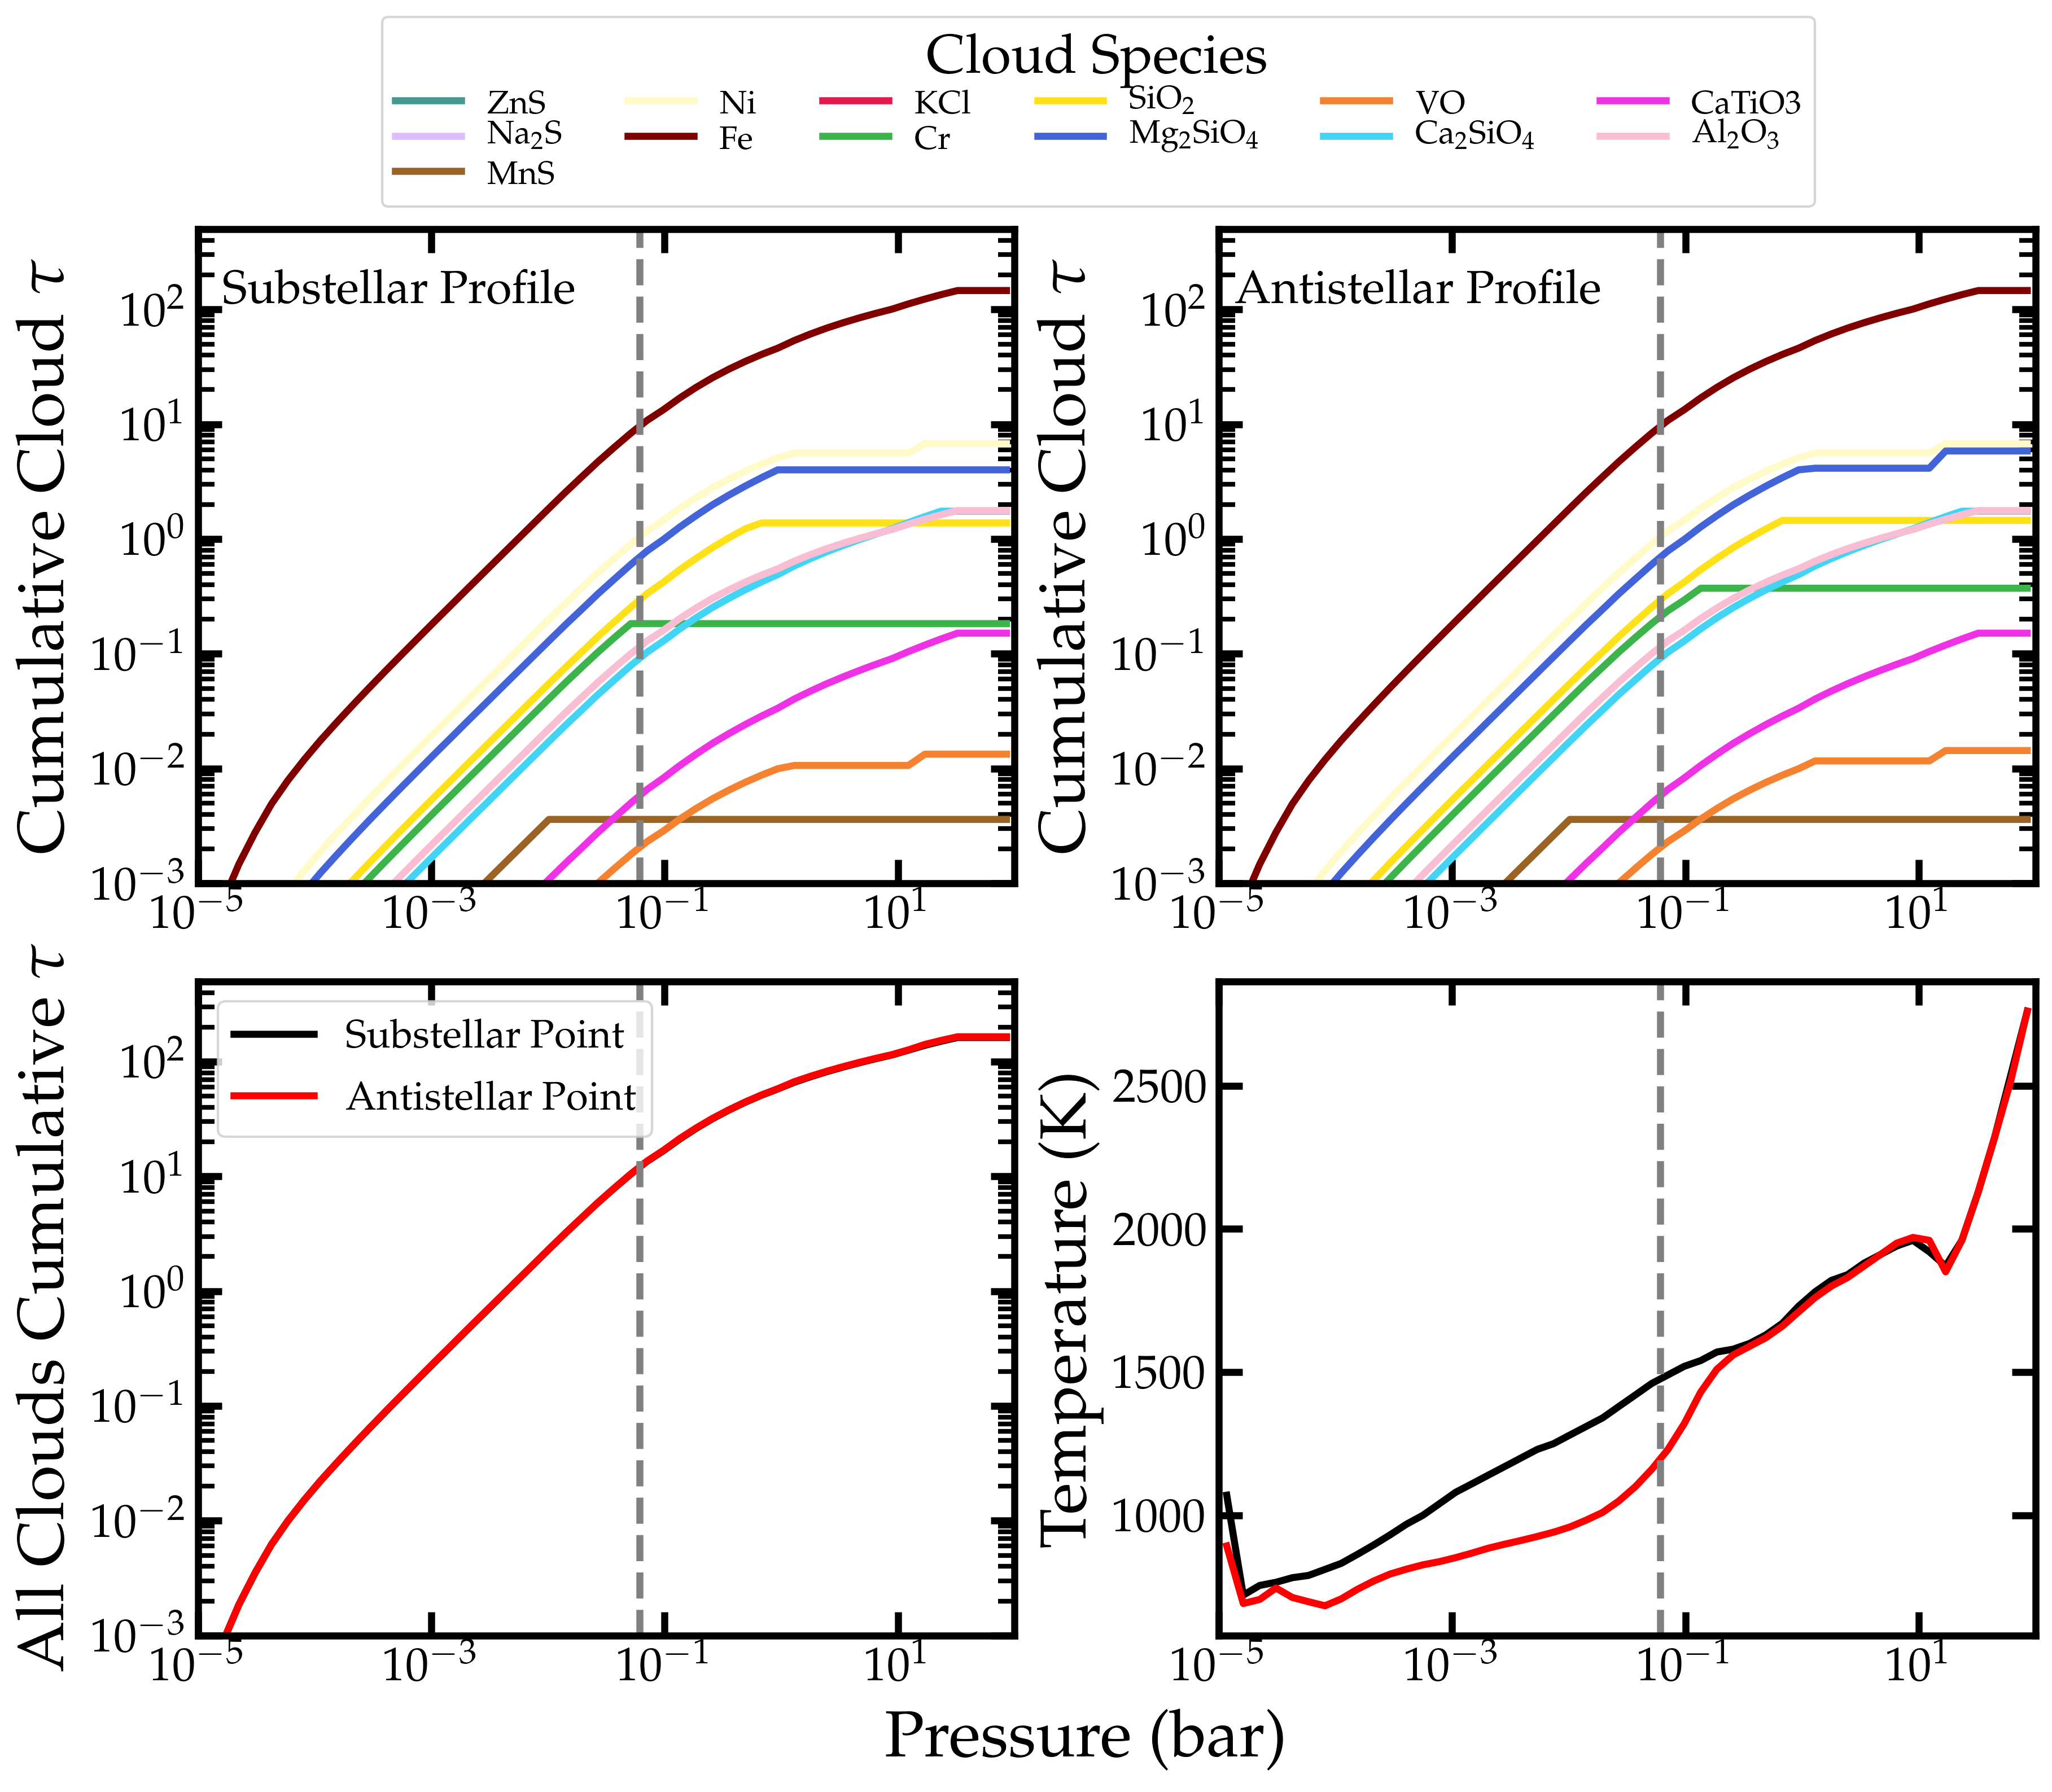

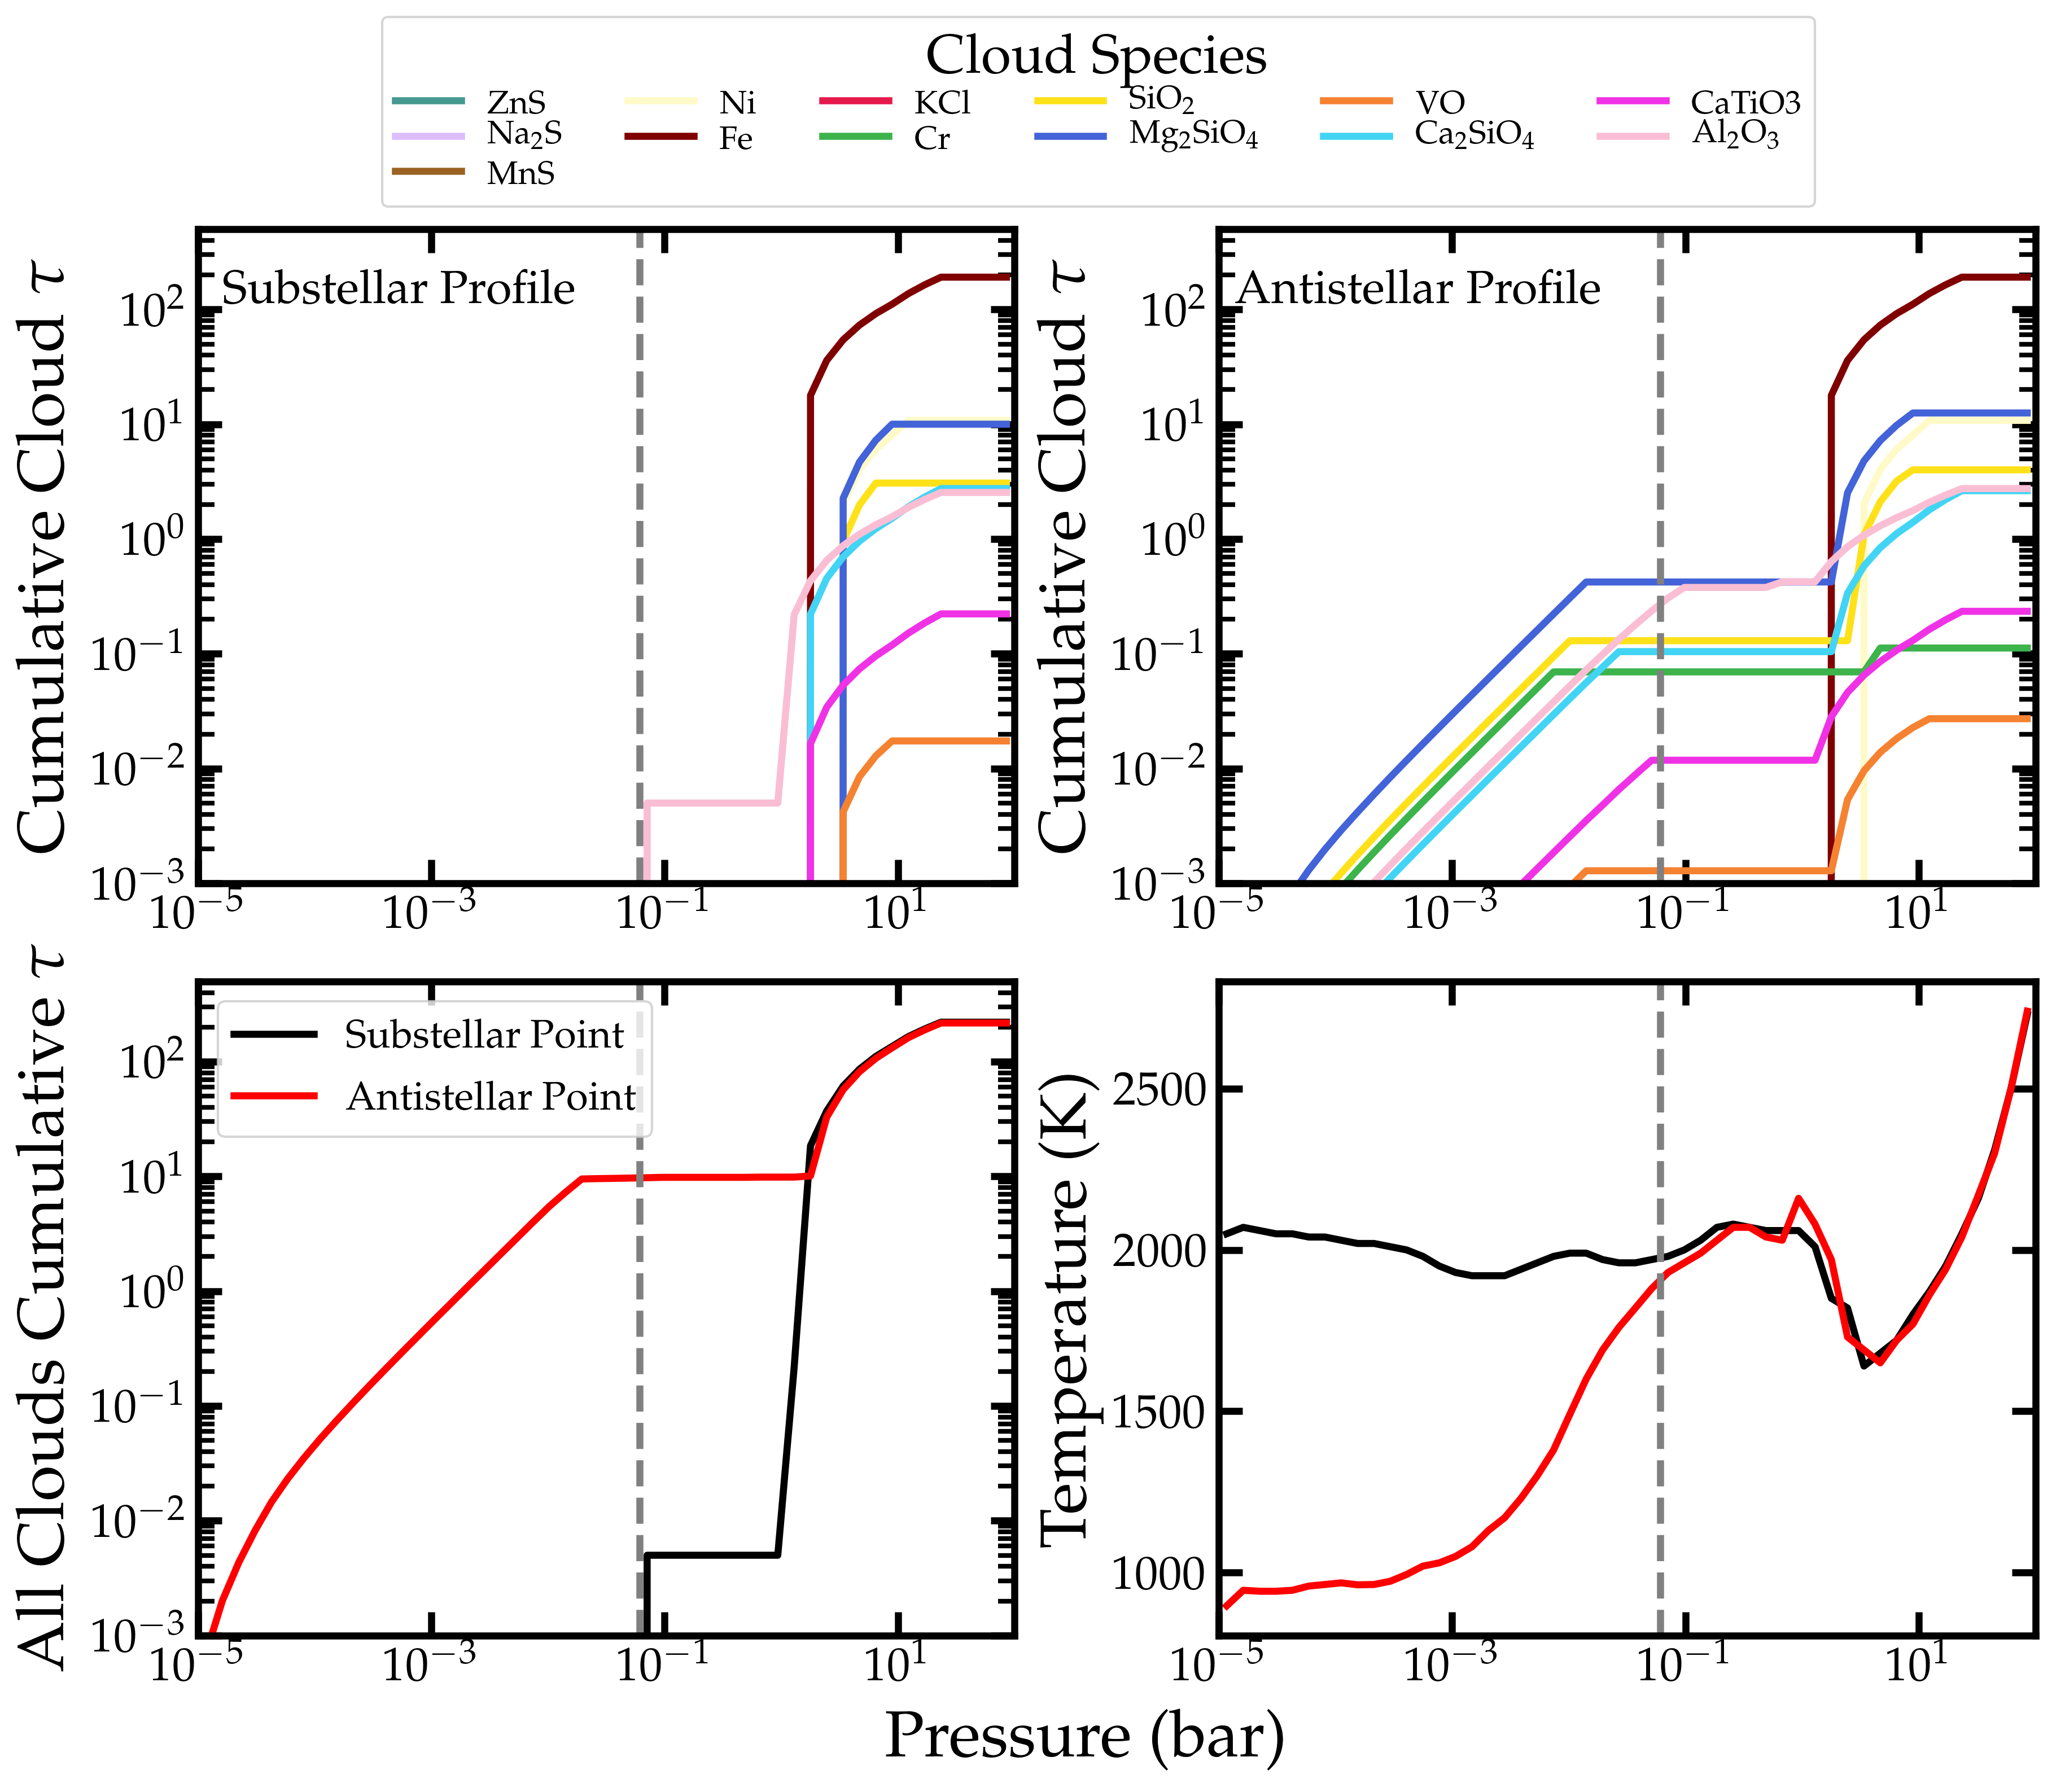

In [7]:

for planet_name in planet_names:
    i = 0
    file = '../Spectral-Processing/GCM-OUTPUT/' + planet_name +  '_with_clouds_and_wavelength_dependence.txt'
    df1 = pd.read_csv(file,
                     delim_whitespace=True, skiprows=0,
                     names=('lat', 'lon', 'level',
                                        'alt','pres','temp',
                                        'u', 'v', 'w',
                                        'aero_tau_1', 'sw_asym_1', 'sw_pi0_1',
                                        'aero_tau_2', 'sw_asym_2', 'sw_pi0_2',
                                        'aero_tau_3', 'sw_asym_3', 'sw_pi0_3',
                                        'aero_tau_4', 'sw_asym_4', 'sw_pi0_4',
                                        'aero_tau_5', 'sw_asym_5', 'sw_pi0_5',
                                        'aero_tau_6', 'sw_asym_6', 'sw_pi0_6',
                                        'aero_tau_7', 'sw_asym_7', 'sw_pi0_7',
                                        'aero_tau_8', 'sw_asym_8', 'sw_pi0_8',
                                        'aero_tau_9', 'sw_asym_9', 'sw_pi0_9',
                                        'aero_tau_10', 'sw_asym_10', 'sw_pi0_10',
                                        'aero_tau_11', 'sw_asym_11', 'sw_pi0_11',
                                        'aero_tau_12', 'sw_asym_12', 'sw_pi0_12',
                                        'aero_tau_13', 'sw_asym_13', 'sw_pi0_13',
                                        'haze_tau_optical_depth_per_bar', 'haze_asym', 'haze_pi0'))




    df2 = pd.read_csv(file,
                     delim_whitespace=True, skiprows=0,
                     names=('lat', 'lon', 'level',
                            'alt','pres','temp',
                            'u', 'v', 'w',
                            'aero_tau_1', 'sw_asym_1', 'sw_pi0_1',
                            'aero_tau_2', 'sw_asym_2', 'sw_pi0_2',
                            'aero_tau_3', 'sw_asym_3', 'sw_pi0_3',
                            'aero_tau_4', 'sw_asym_4', 'sw_pi0_4',
                            'aero_tau_5', 'sw_asym_5', 'sw_pi0_5',
                            'aero_tau_6', 'sw_asym_6', 'sw_pi0_6',
                            'aero_tau_7', 'sw_asym_7', 'sw_pi0_7',
                            'aero_tau_8', 'sw_asym_8', 'sw_pi0_8',
                            'aero_tau_9', 'sw_asym_9', 'sw_pi0_9',
                            'aero_tau_10', 'sw_asym_10', 'sw_pi0_10',
                            'aero_tau_11', 'sw_asym_11', 'sw_pi0_11',
                            'aero_tau_12', 'sw_asym_12', 'sw_pi0_12',
                            'aero_tau_13', 'sw_asym_13', 'sw_pi0_13',
                            'haze_tau_optical_depth_per_bar', 'haze_asym', 'haze_pi0'))
    
    df1 = df1[(df1['lat'] == 1.86)  & (df1['lon'] == 0.0)].reset_index(drop=True)
    df2 = df2[(df2['lat'] == 1.86)  & (df2['lon'] == 180.0)].reset_index(drop=True)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,11))
    plt.subplots_adjust(wspace=0.25, hspace=0.15)

    optical_depths_1 = df1.aero_tau_1 + df1.aero_tau_2 + df1.aero_tau_3 + df1.aero_tau_4 + \
                       df1.aero_tau_5 + df1.aero_tau_6 + df1.aero_tau_7 + df1.aero_tau_8 + \
                       df1.aero_tau_9 + df1.aero_tau_10 + df1.aero_tau_11 + df1.aero_tau_12 + \
                       df1.aero_tau_13

    optical_depths_2 = df2.aero_tau_1 + df2.aero_tau_2 + df2.aero_tau_3 + df2.aero_tau_4 + \
                       df2.aero_tau_5 + df2.aero_tau_6 + df2.aero_tau_7 + df2.aero_tau_8 + \
                       df2.aero_tau_9 + df2.aero_tau_10 + df2.aero_tau_11 + df2.aero_tau_12 + \
                       df2.aero_tau_13

    cum_optical_depths_1 = np.cumsum(list(optical_depths_1))
    cum_optical_depths_2 = np.cumsum(list(optical_depths_2))

    if 'ALL' in planet_name:
        ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_2)), color=colors[8], linewidth=3, label='ZnS')
        ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_3)), color=colors[9], linewidth=3, label=r'Na$_2$S')
        ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_4)), color=colors[10], linewidth=3, label='MnS')
        ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_9)), color=colors[11], linewidth=3, label='Ni')
        ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_10)), color=colors[12], linewidth=3, label='Fe')

        ax[0,1].plot(df2.pres, np.cumsum(list(df1.aero_tau_2)), color=colors[8], linewidth=3, label='ZnS')
        ax[0,1].plot(df2.pres, np.cumsum(list(df1.aero_tau_3)), color=colors[9], linewidth=3, label=r'Na$_2$S')
        ax[0,1].plot(df2.pres, np.cumsum(list(df1.aero_tau_4)), color=colors[10], linewidth=3, label='MnS')
        ax[0,1].plot(df2.pres, np.cumsum(list(df1.aero_tau_9)), color=colors[11], linewidth=3, label='Ni')
        ax[0,1].plot(df2.pres, np.cumsum(list(df1.aero_tau_10)), color=colors[12], linewidth=3, label='Fe')
    
    
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_1)),  color=colors[0], linewidth=3, label='KCl')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_5)),  color=colors[1], linewidth=3, label='Cr')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_6)),  color=colors[2], linewidth=3, label='SiO$_2$')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_7)),  color=colors[3], linewidth=3, label=r'Mg$_2$SiO$_4$')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_8)),  color=colors[4], linewidth=3, label='VO')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_11)), color=colors[5], linewidth=3, label=r'Ca$_2$SiO$_4$')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_12)), color=colors[6], linewidth=3, label=r'CaTiO3')
    ax[0,0].plot(df1.pres, np.cumsum(list(df1.aero_tau_13)), color=colors[7], linewidth=3, label=r'Al$_2$O$_3$')

    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_1)), color=colors[0], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_5)), color=colors[1], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_6)), color=colors[2], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_7)), color=colors[3], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_8)), color=colors[4], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_11)), color=colors[5], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_12)), color=colors[6], linewidth=3)
    ax[0,1].plot(df2.pres, np.cumsum(list(df2.aero_tau_13)), color=colors[7], linewidth=3,)
    
    

    ax[1,0].plot(df1.pres, cum_optical_depths_1, color='black', linewidth=3, label='Substellar Point')
    ax[1,0].plot(df2.pres, cum_optical_depths_2, color='red', linewidth=3, label='Antistellar Point')

    ax[1,1].plot(df1.pres, df1.temp, color='black', linewidth=3)
    ax[1,1].plot(df2.pres, df2.temp, color='red', linewidth=3)

    ax[0,0].set_xscale('log')
    ax[0,1].set_xscale('log')
    ax[1,0].set_xscale('log')
    ax[1,1].set_xscale('log')


    ax[0,0].set_yscale('log')
    ax[0,1].set_yscale('log')
    ax[1,0].set_yscale('log')
    ax[1,1].set_yscale('linear')
    
    ax[0,0].set_ylim([1e-3, 5e2])
    ax[0,1].set_ylim([1e-3, 5e2])
    ax[1,0].set_ylim([1e-3, 5e2])
    
    ax[0,0].set_xlim([1e-5, 1e2])
    ax[0,1].set_xlim([1e-5, 1e2])
    ax[1,0].set_xlim([1e-5, 1e2])
    ax[1,1].set_xlim([1e-5, 1e2])

    ax[0,0].set_ylabel(r'Cumulative Cloud $\tau$')
    ax[0,1].set_ylabel(r'Cumulative Cloud $\tau$')
    ax[1,0].set_ylabel(r'All Clouds Cumulative $\tau$')
    ax[1,1].set_ylabel('Temperature (K)')

    ax[0,0].axvline(x=P_phots[i],color='gray', linestyle='dashed', linewidth=3)
    ax[0,1].axvline(x=P_phots[i], color='gray', linestyle='dashed', linewidth=3)
    ax[1,0].axvline(x=P_phots[i], color='gray', linestyle='dashed', linewidth=3)
    ax[1,1].axvline(x=P_phots[i], color='gray', linestyle='dashed', label='Photosphere Pressure Level', linewidth=3)

    plt.rcParams['legend.title_fontsize'] = 'small'
    ax[0,0].legend(fontsize=14, ncol=6, handleheight=1, labelspacing=0.0,
                   title="Cloud Species", bbox_to_anchor=(2.0, 1.35))
    ax[1,0].legend()
    #ax[1,1].legend()


    fig.text(0.21, 0.84, r"Substellar Profile", size=20, ha='center')
    fig.text(0.64, 0.84, r"Antistellar Profile", size=20, ha='center')

    fig.text(0.5, 0.06, r"Pressure (bar)", size=28, ha='center')

    plt.savefig('../Figures/Aerosol_Profiles_{}.png'.format(planet_name), bbox_inches='tight', dpi=100)
    i = i + 1
    
    